In [1]:
from braket.aws.aws_session import AwsSession 
import boto3
import os 
from dotenv import load_dotenv
from qiskit import *
from qiskit_braket_provider import BraketProvider
from qiskit.visualization import plot_histogram
from matplotlib import pyplot

Section - Qubit Register and Classical Register Initialization

In [2]:
# Load environment variables 
load_dotenv()

boto_session = boto3.Session(
    aws_access_key_id=os.environ['aws_access'],
    aws_secret_access_key=os.environ['aws_secret'],
    region_name=os.environ['aws_region'],
)
session = AwsSession(boto_session)
provider = BraketProvider()
backend = provider.get_backend("SV1", aws_session = session)

qr = QuantumRegister(9, name='qr')
cr = ClassicalRegister(9, name='cr')

shor = QuantumCircuit(qr,cr)

Section - Superposition State Preparation (|1> on first qubit, others in superposition)

In [3]:
# shor.x(qr[0]) # Uncomment to set the first qubit to |1> (optional)

shor.cx(qr[0],qr[3])
shor.cx(qr[0],qr[6])

shor.h(qr[0])
shor.h(qr[3])
shor.h(qr[6])

shor.cx(qr[0],qr[1])
shor.cx(qr[3],qr[4])
shor.cx(qr[6],qr[7])

shor.cx(qr[0],qr[2])
shor.cx(qr[3],qr[5])
shor.cx(qr[6],qr[8])

shor.barrier(qr)

# Error Part of Circuit Start

shor.x(qr[0]) # Bit flip
shor.z(qr[0]) # Bit phase flip

# Error Part of Circuit End

shor.barrier(qr)
shor.cx(qr[0],qr[1])
shor.cx(qr[3],qr[4])
shor.cx(qr[6],qr[7])

shor.cx(qr[0],qr[2])
shor.cx(qr[3],qr[5])
shor.cx(qr[6],qr[8])

shor.ccx(qr[1],qr[2],qr[0])
shor.ccx(qr[4],qr[5],qr[3])
shor.ccx(qr[8],qr[7],qr[6])

shor.h(qr[0])
shor.h(qr[3])
shor.h(qr[6])

shor.cx(qr[0],qr[3])
shor.cx(qr[0],qr[6])
shor.ccx(qr[6],qr[3],qr[0])

shor.barrier(qr)

shor.measure_all()

Section - Circuit Visualization

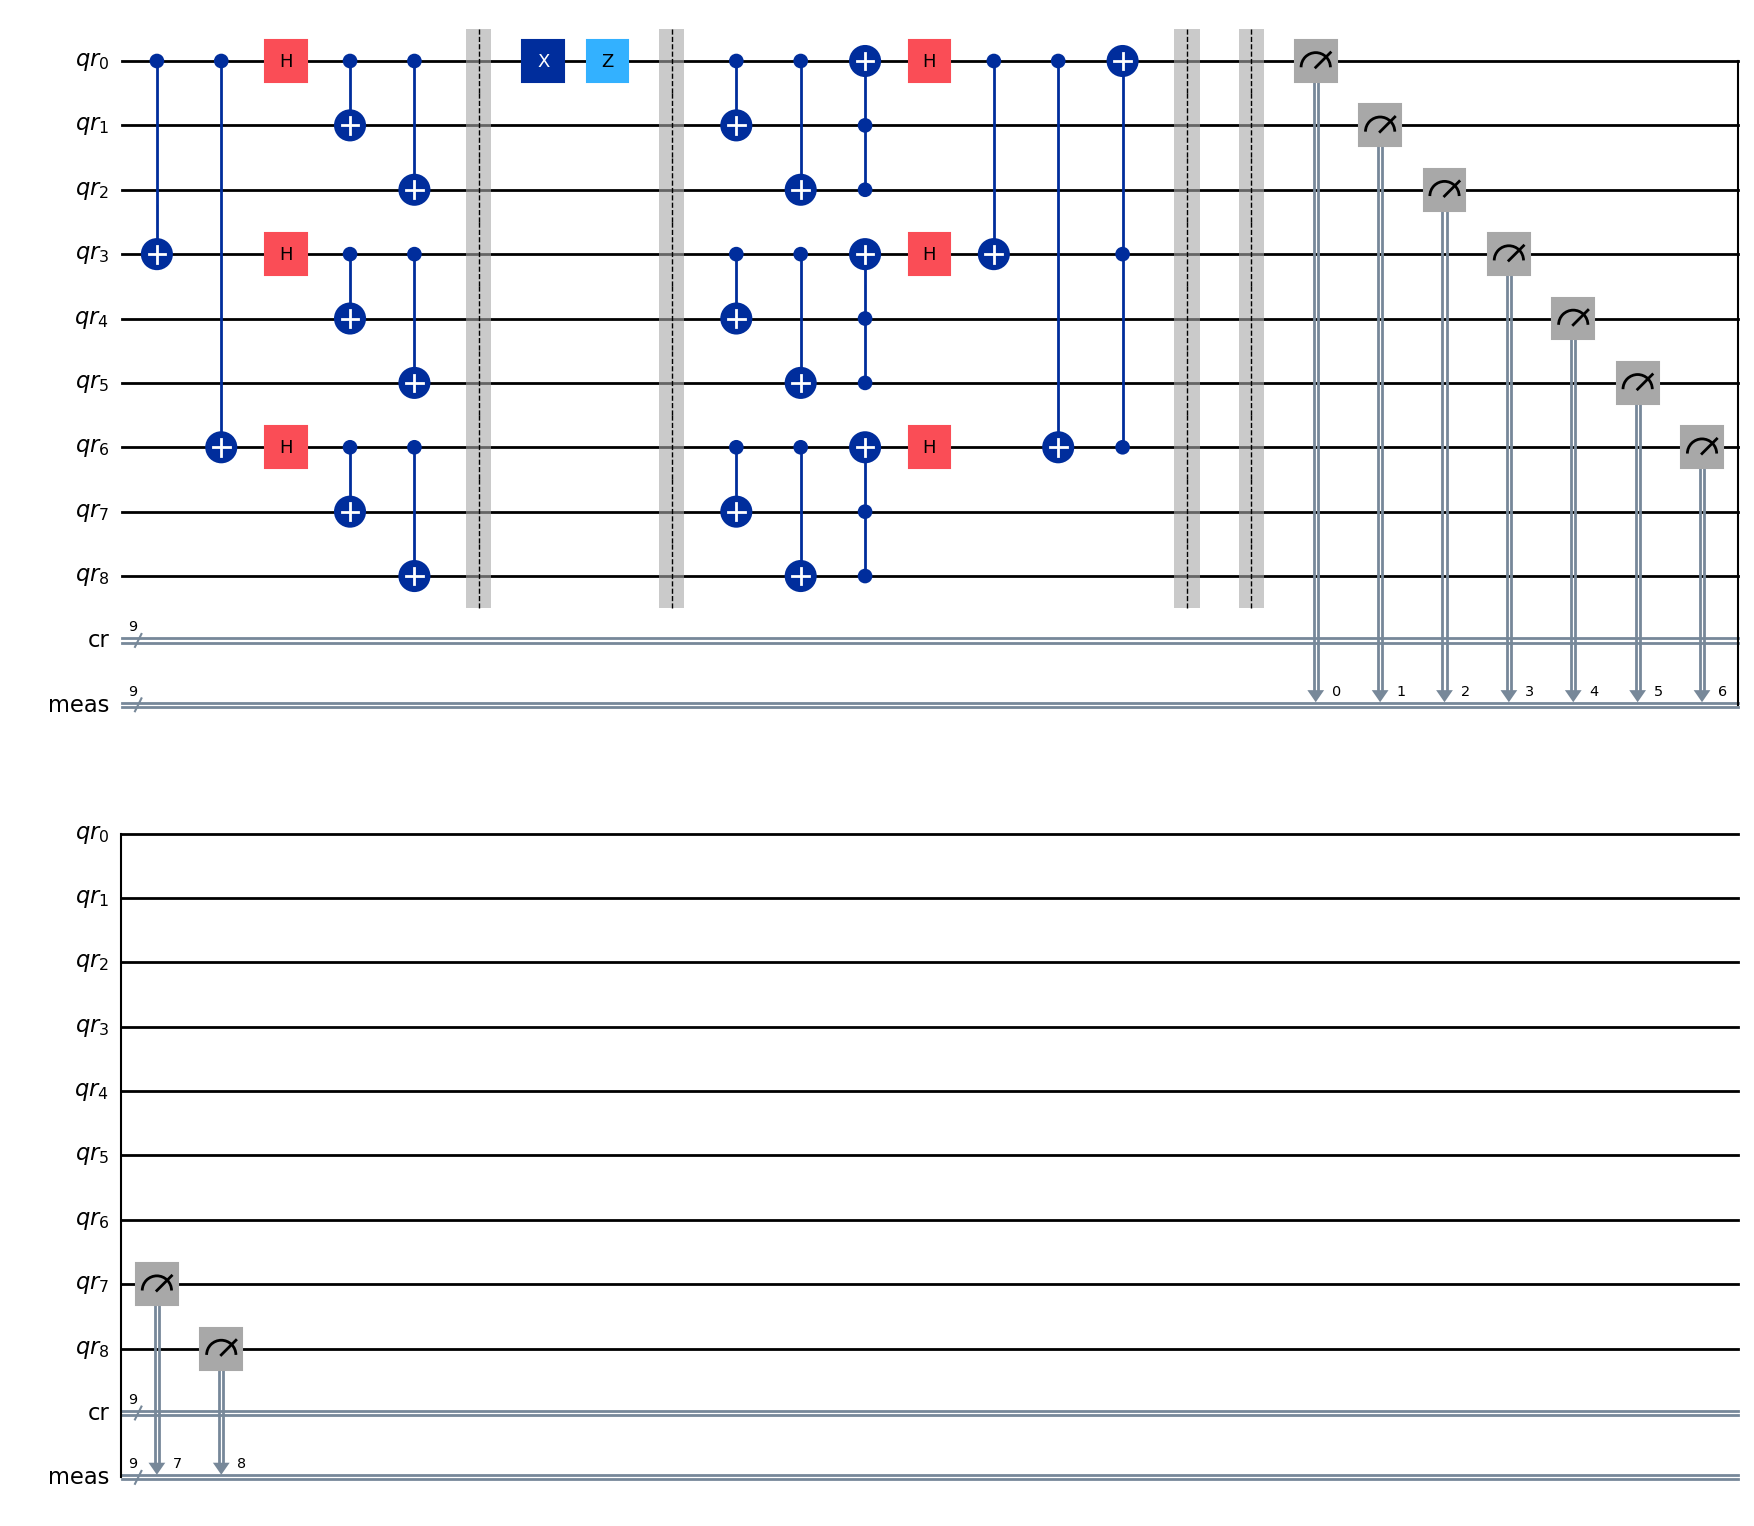

In [4]:
shor.draw("mpl")

Section - Circuit Execution and Result Analysis

c:\Users\Lowkey\Documents\Code\QuantumSetup.git\.venv\Lib\site-packages\qiskit_braket_provider\providers\adapter.py:457: UserWarning: The Qiskit circuit contains barrier instructions that are ignored.
  warnings.warn(
c:\Users\Lowkey\Documents\Code\QuantumSetup.git\.venv\Lib\site-packages\qiskit_braket_provider\providers\adapter.py:500: UserWarning: Device does not support global phase; global phase of 3.141592653589793 will not be included in Braket circuit
  warnings.warn(


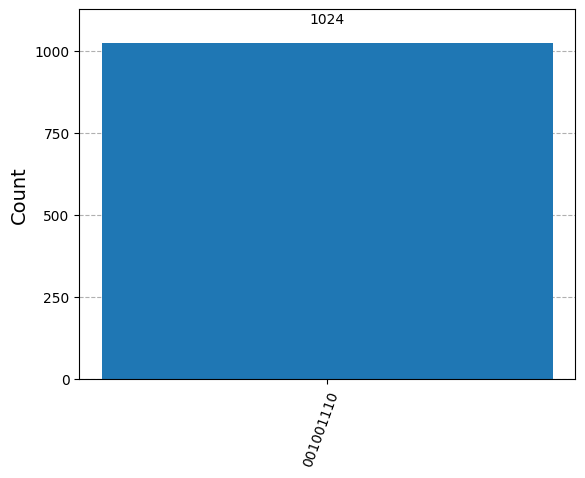

In [5]:
# Run shor code circuit
qc_compiled = transpile(shor, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts()

# Plot the result
plot_histogram(counts)